In [1]:
import pandas as pd
import numpy as np


In [57]:
df = pd.read_csv("../data/raw/out.csv", index_col=0)
cat_df = df.select_dtypes(include=['object', 'category']).columns.tolist()
cat_df = df[['Sex', 'NOC', 'Season', 'City', 'Sport', 'Medal']]
num_df = df.select_dtypes(include=['int', 'float']).columns.tolist()
num_df = df[['Age', 'Height', 'Weight']]
year_df = df[['Year']]
cat_df, num_df

(       Sex          NOC  Season     City      Sport      Medal
 135558   F       Others  Summer  America  Athletics  Not_Medal
 96005    M           UK  Summer   Europe  Athletics  Not_Medal
 95427    M       France  Summer   Europe  Athletics     Bronze
 96011    F          USA  Summer  America  Athletics  Not_Medal
 223779   M  Netherlands  Summer   Europe  Athletics  Not_Medal
 ...     ..          ...     ...      ...        ...        ...
 38126    M          USA  Summer  America     Others  Not_Medal
 29994    M          USA  Summer  America     Others     Bronze
 50275    M       Others  Summer   Europe     Others       Gold
 252988   M       Others  Summer   Europe     Others       Gold
 214105   M  Switzerland  Summer   Europe     Others       Gold
 
 [271116 rows x 6 columns],
          Age  Height  Weight
 135558  30.0   163.0    53.0
 96005   23.0     NaN     NaN
 95427   31.0   160.0    49.0
 96011   19.0   181.0    95.0
 223779  31.0   197.0   129.0
 ...      ...     ... 

In [58]:
num_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 135558 to 214105
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Age     261642 non-null  float64
 1   Height  210945 non-null  float64
 2   Weight  208241 non-null  float64
dtypes: float64(3)
memory usage: 8.3 MB


In [59]:
#ENCODING - CATEGORICAL DATA
from sklearn.preprocessing import OneHotEncoder
labelencoder_df = OneHotEncoder(handle_unknown='ignore')
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
cat_df_encode = labelencoder_df.fit_transform(cat_df).toarray()
cat_df_encode_col = labelencoder_df.get_feature_names(cat_cols)
cat_df_en = pd.DataFrame(cat_df_encode, columns=cat_df_encode_col)
cat_df_en.head()

c:\Users\Luismi\anaconda3\envs\MLG\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Sex_F,Sex_M,NOC_Australia,NOC_Canada,NOC_China,NOC_Czech Republic,NOC_Finland,NOC_France,NOC_Germany,NOC_Hungary,...,Sport_Others,Sport_Rowing,Sport_Sailing,Sport_Shooting,Sport_Swimming,Sport_Wrestling,Medal_Bronze,Medal_Gold,Medal_Not_Medal,Medal_Silver
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [67]:
print(f"In column 'Age' There are :  {(((df['Age'].isnull().sum())/df['Age'].shape[0]))*100:.4f} %  missing values")

In column 'Age' There are :  3.4944 %  missing values


In [61]:
# SCALING NUMERICAL DATA
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
num_df_columns = num_df.columns.tolist()
num_df_scaled = ss.fit_transform(num_df)
num_df_scaled = pd.DataFrame(num_df_scaled, columns=num_df_columns)
num_df_scaled['Year'] = year_df
num_df_scaled.head()

,Age,Height,Weight,Year
0,0.694935,-1.173080,-1.233789,1992
1,-0.399918,NaN,NaN,2012
2,0.851343,-1.458294,-1.512574,1920
3,-1.025549,0.538201,1.693451,1900
4,0.851343,2.059339,4.063121,1988


In [62]:
# CONCAT NUMERICAL AND CATEGORICAL DATA
df_converted = pd.concat([num_df_scaled, cat_df_en], axis=1)
df_converted.head()

,Age,Height,Weight,Year,Sex_F,Sex_M,NOC_Australia,NOC_Canada,NOC_China,NOC_Czech Republic,...,Sport_Others,Sport_Rowing,Sport_Sailing,Sport_Shooting,Sport_Swimming,Sport_Wrestling,Medal_Bronze,Medal_Gold,Medal_Not_Medal,Medal_Silver
0,0.694935,-1.173080,-1.233789,1992,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.399918,NaN,NaN,2012,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.851343,-1.458294,-1.512574,1920,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-1.025549,0.538201,1.693451,1900,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.851343,2.059339,4.063121,1988,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### 4 TP -> DIVIDED IN NO DATA for Weight and Height columns 1896 - 2016

TP 1 -> 1896 - 1918 EARLY YEARS -> NO DATA Weight and Height

TP 2 -> 1919 - 1945 INTERWARS -> NO DATA Weight and Height

TP 3 -> 1946 - 1991 COLD WAR -> NO DATA Weight and Height until 1960

TP 4 -> 1992 - 2016 CONTEMPORARY

In [51]:
# TO handle easier this data_set I will split in two different categories -> NO DATA AND DATA -> In no data period I will drop these columns to avoid bias

df_converted_NODATA = df_converted[(df_converted['Year'] <= 1959)]
df_converted_DATA = df_converted[(df_converted['Year'] >= 1960)]


In [63]:
df_converted_NODATA = df_converted_NODATA.drop(columns=['Height', 'Weight'])

In [64]:
df_converted_NODATA

,Age,Year,Sex_F,Sex_M,NOC_Australia,NOC_Canada,NOC_China,NOC_Czech Republic,NOC_Finland,NOC_France,...,Sport_Others,Sport_Rowing,Sport_Sailing,Sport_Shooting,Sport_Swimming,Sport_Wrestling,Medal_Bronze,Medal_Gold,Medal_Not_Medal,Medal_Silver
2,0.851343,1920,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-1.025549,1900,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
26,-0.087103,1932,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
27,-0.869141,1932,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29,-0.243511,1952,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271075,3.197458,1928,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
271076,0.538527,1952,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
271077,NaN,1952,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
271078,0.538527,1956,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [71]:
# IMPUTING MISSING DATA (AGES)
from sklearn.impute import KNNImputer

col = df_converted_NODATA.columns
knn_imp = KNNImputer(n_neighbors=5)
df_age_inputed = pd.DataFrame(knn_imp.fit_transform(df_converted_NODATA),
                           columns=col)

,Age,Year,Sex_F,Sex_M,NOC_Australia,NOC_Canada,NOC_China,NOC_Czech Republic,NOC_Finland,NOC_France,...,Sport_Others,Sport_Rowing,Sport_Sailing,Sport_Shooting,Sport_Swimming,Sport_Wrestling,Medal_Bronze,Medal_Gold,Medal_Not_Medal,Medal_Silver
0,0.851343,1920.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-1.025549,1900.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.087103,1932.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.869141,1932.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.243511,1952.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62039,3.197458,1928.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
62040,0.538527,1952.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
62041,0.913906,1952.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
62042,0.538527,1956.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [72]:
df_age_inputed

,Age,Year,Sex_F,Sex_M,NOC_Australia,NOC_Canada,NOC_China,NOC_Czech Republic,NOC_Finland,NOC_France,...,Sport_Others,Sport_Rowing,Sport_Sailing,Sport_Shooting,Sport_Swimming,Sport_Wrestling,Medal_Bronze,Medal_Gold,Medal_Not_Medal,Medal_Silver
0,0.851343,1920.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-1.025549,1900.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.087103,1932.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.869141,1932.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.243511,1952.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62039,3.197458,1928.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
62040,0.538527,1952.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
62041,0.913906,1952.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
62042,0.538527,1956.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


For n_clusters = 2 The average silhouette_score is : 0.6052
For n_clusters = 3 The average silhouette_score is : 0.6693
For n_clusters = 4 The average silhouette_score is : 0.6296
For n_clusters = 5 The average silhouette_score is : 0.5946
For n_clusters = 6 The average silhouette_score is : 0.4756
For n_clusters = 7 The average silhouette_score is : 0.4364
For n_clusters = 8 The average silhouette_score is : 0.457
For n_clusters = 9 The average silhouette_score is : 0.4393
For n_clusters = 10 The average silhouette_score is : 0.426
For n_clusters = 11 The average silhouette_score is : 0.4333
For n_clusters = 12 The average silhouette_score is : 0.4139
For n_clusters = 13 The average silhouette_score is : 0.3683
For n_clusters = 14 The average silhouette_score is : 0.3342
For n_clusters = 15 The average silhouette_score is : 0.3094
For n_clusters = 16 The average silhouette_score is : 0.2757
For n_clusters = 17 The average silhouette_score is : 0.2822
For n_clusters = 18 The average si

ValueError: x and y must have same first dimension, but have shapes (9,) and (48,)

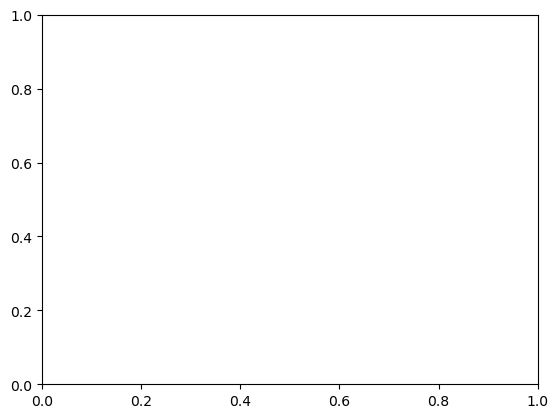

In [80]:
#Trying Clustering with NO_DATA group
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt

silhouette_s = []

for n_clusters in range(2, 50):
    kmeans_pipeline = Pipeline([
        ("cluster", KMeans(n_clusters=n_clusters))])
    
    cluster_labels = kmeans_pipeline.fit_predict(df_age_inputed)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_score(df_age_inputed, cluster_labels).round(4))
    silhouette_s.append(silhouette_score(df_age_inputed, cluster_labels))

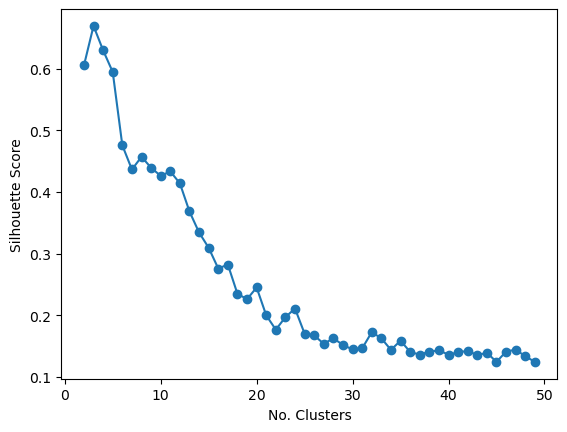

In [82]:
plt.plot(range(2, 50),silhouette_s, "o-")
plt.xlabel("No. Clusters")
plt.ylabel("Silhouette Score")
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.6052
For n_clusters = 3 The average silhouette_score is : 0.6693
For n_clusters = 4 The average silhouette_score is : 0.6296
For n_clusters = 5 The average silhouette_score is : 0.5946
For n_clusters = 6 The average silhouette_score is : 0.4878
For n_clusters = 7 The average silhouette_score is : 0.4482
For n_clusters = 8 The average silhouette_score is : 0.4452
For n_clusters = 9 The average silhouette_score is : 0.4464
For n_clusters = 10 The average silhouette_score is : 0.426
For n_clusters = 11 The average silhouette_score is : 0.4333
For n_clusters = 12 The average silhouette_score is : 0.4139
For n_clusters = 13 The average silhouette_score is : 0.3682
For n_clusters = 14 The average silhouette_score is : 0.3342




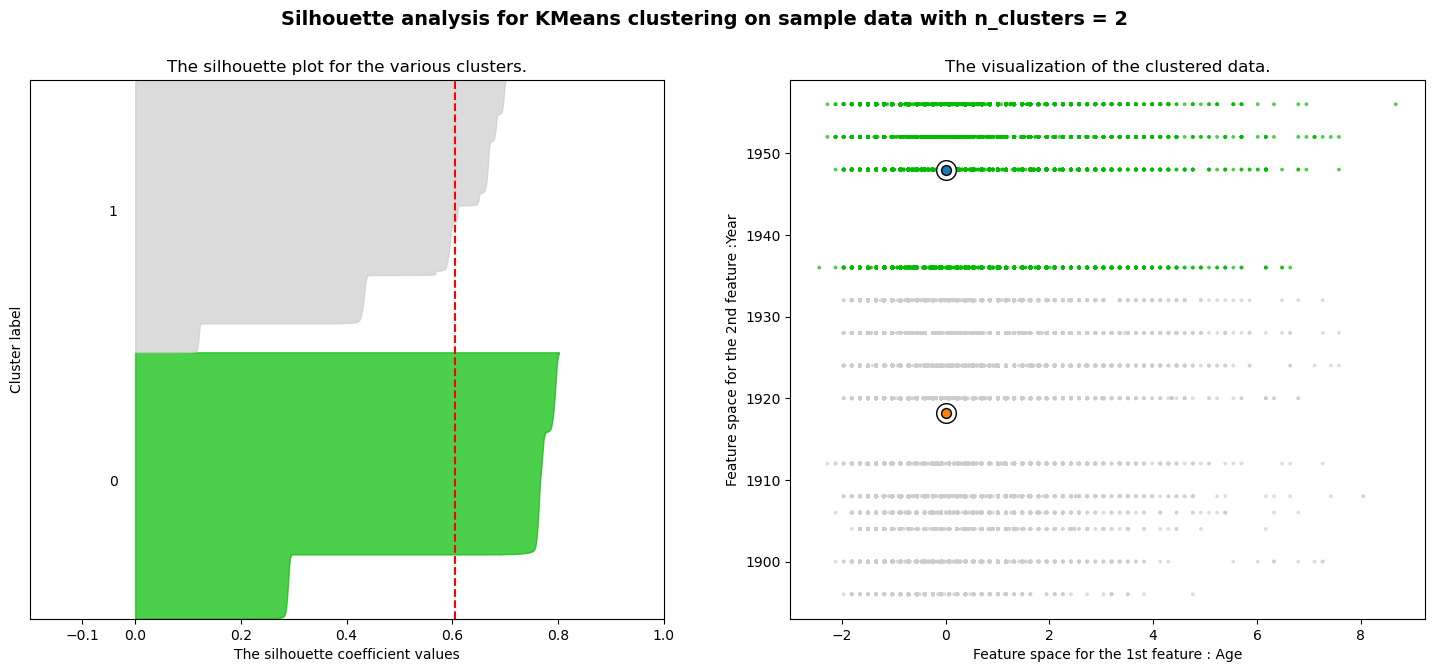

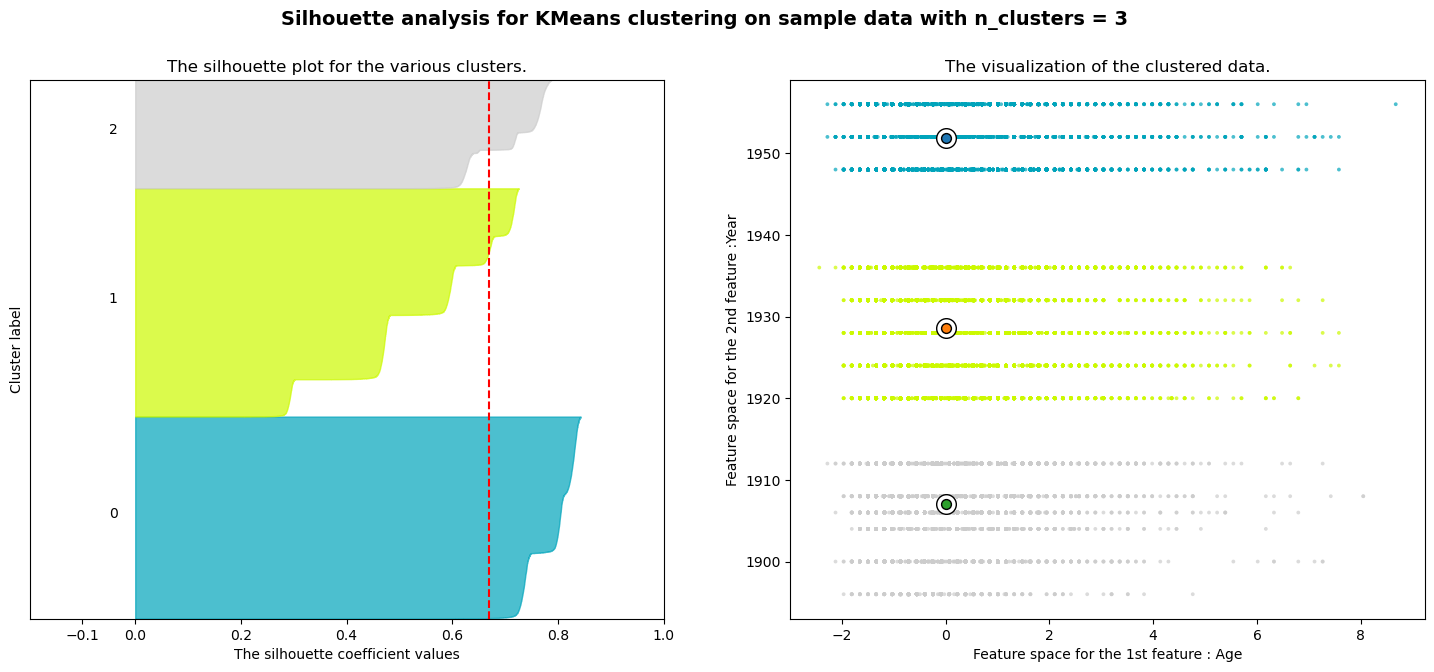

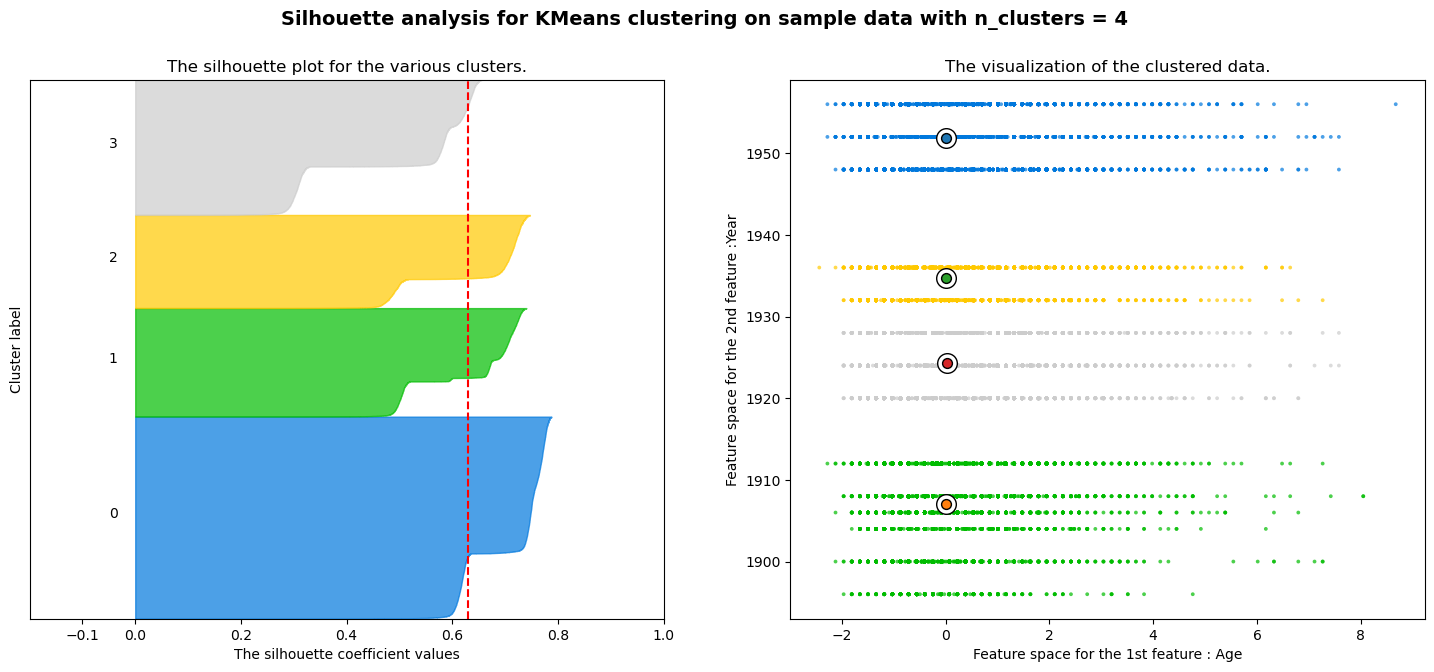

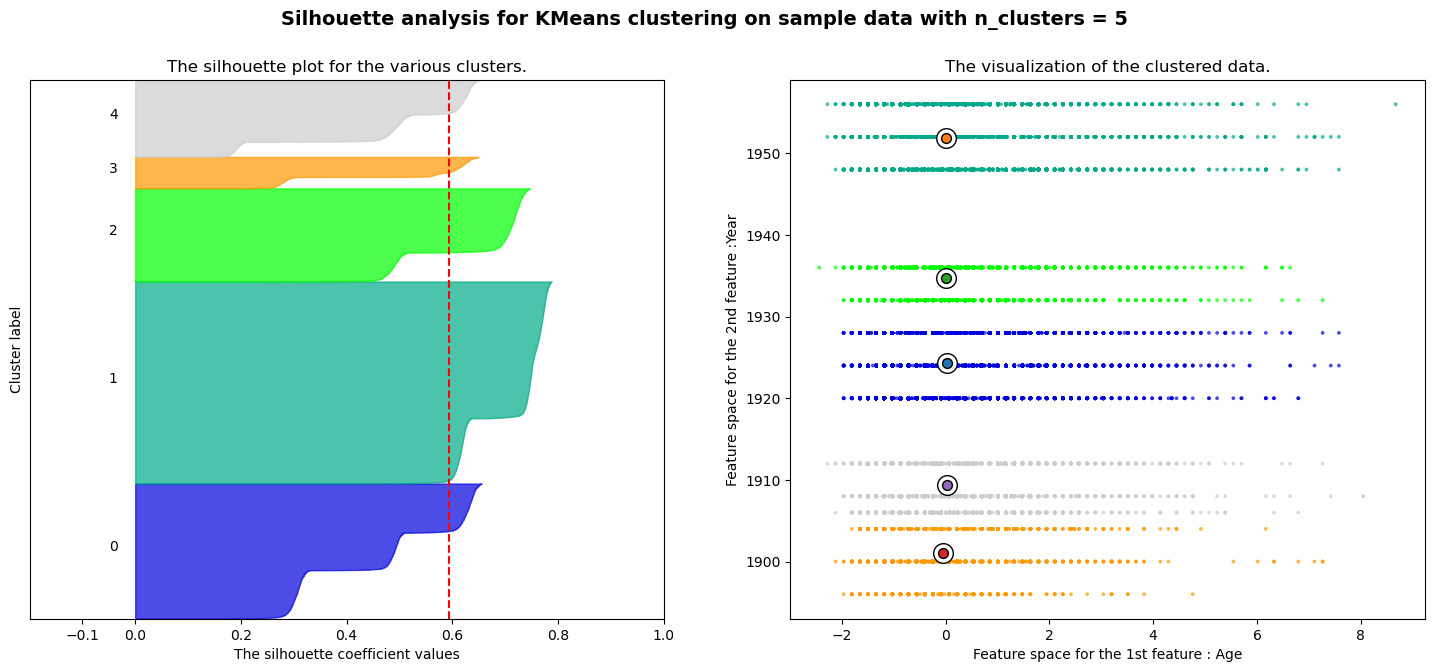

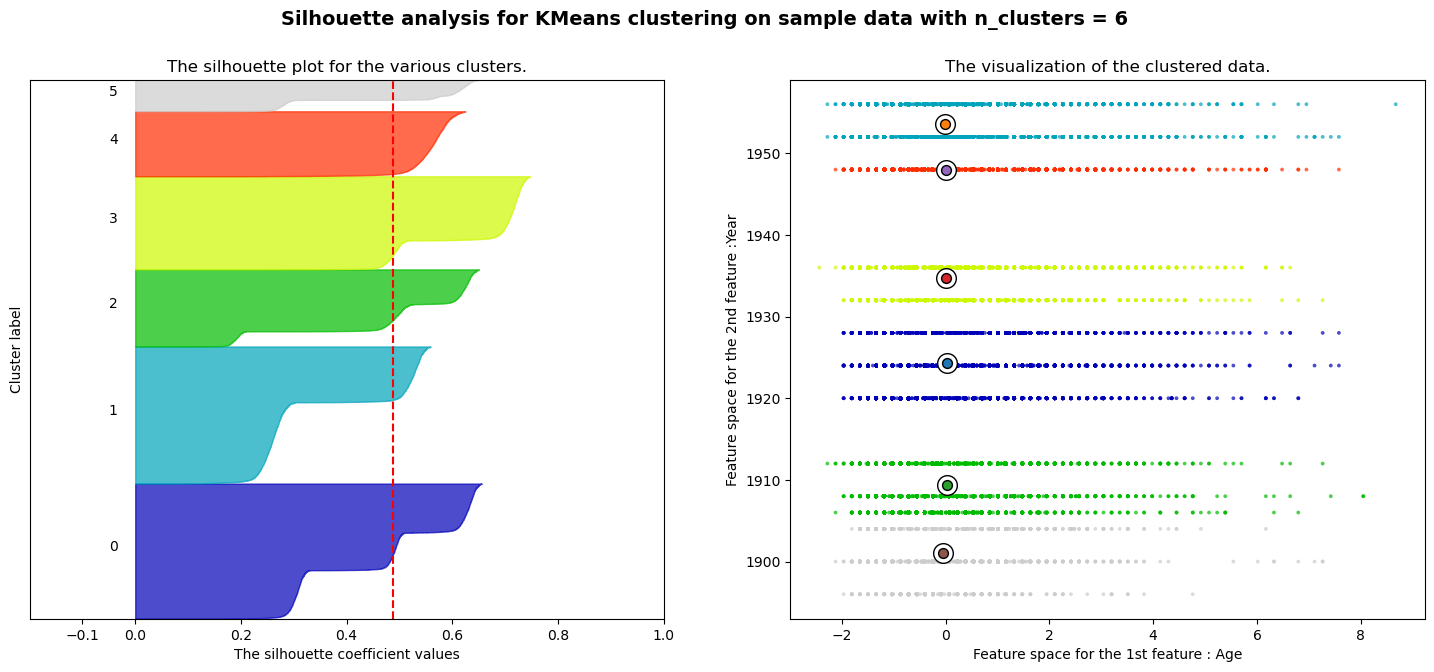

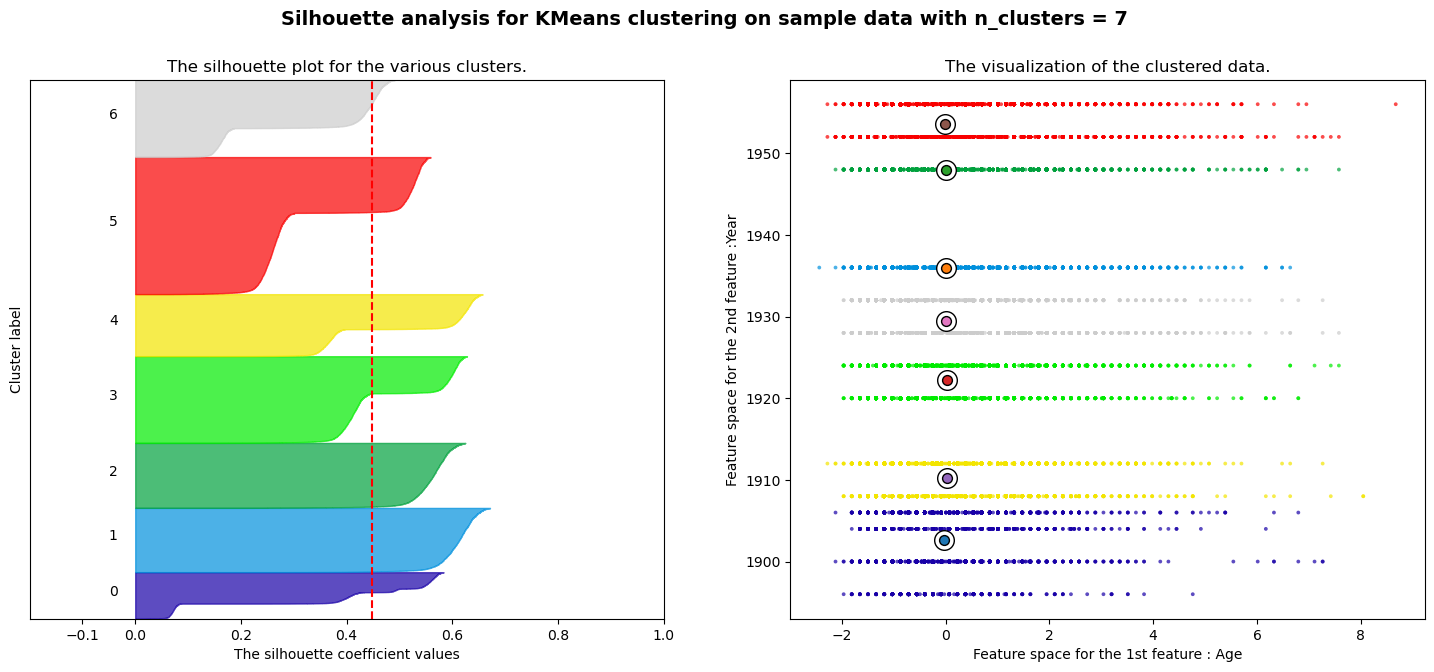

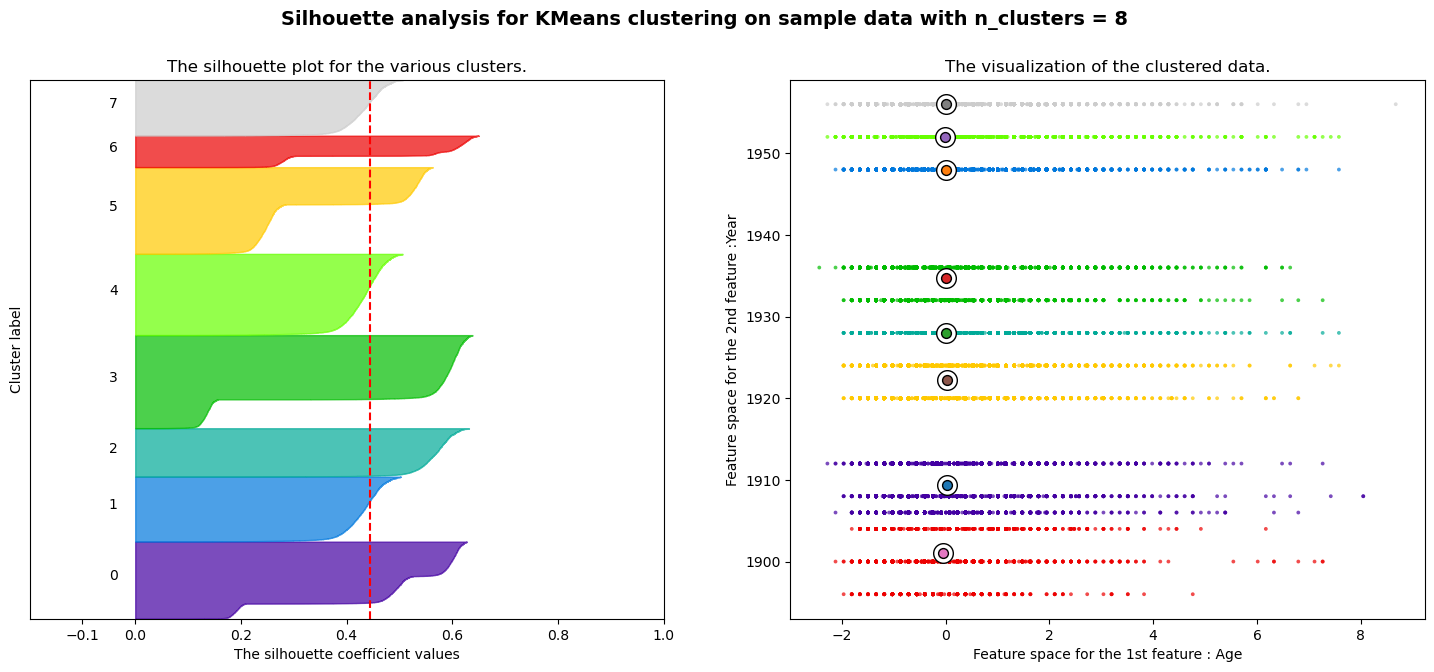

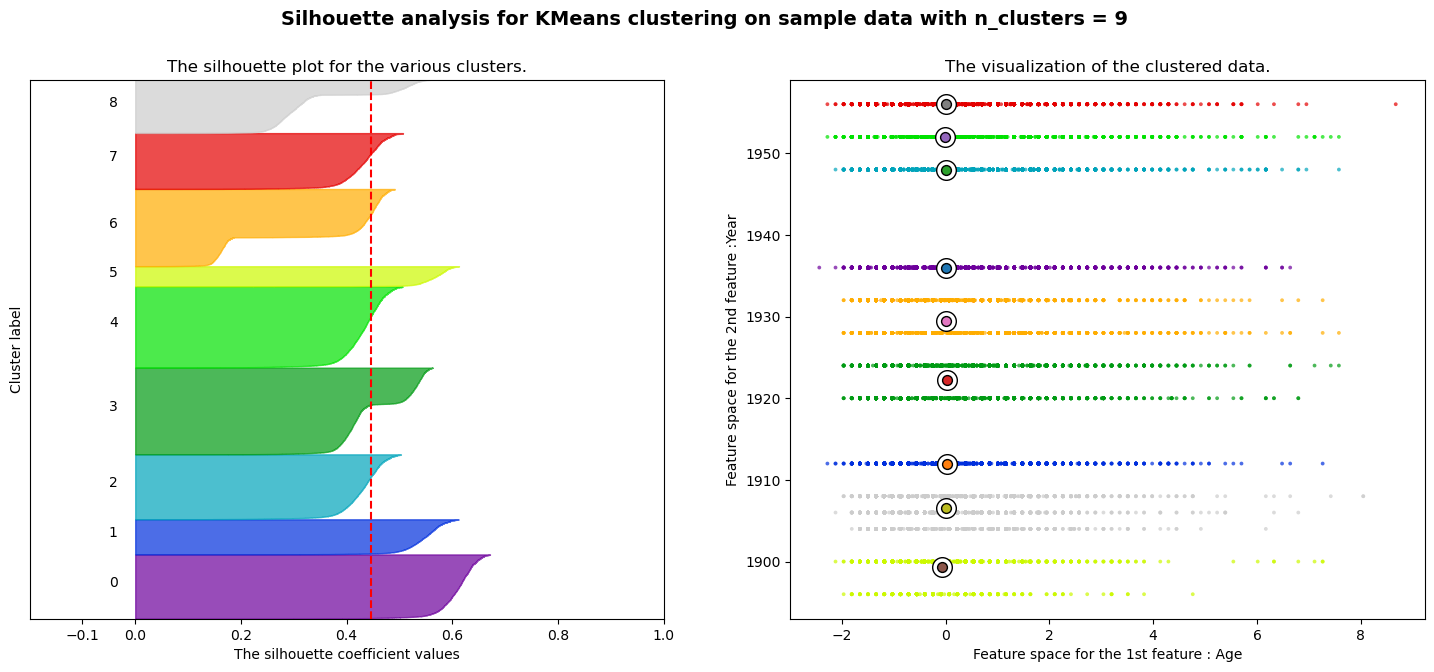

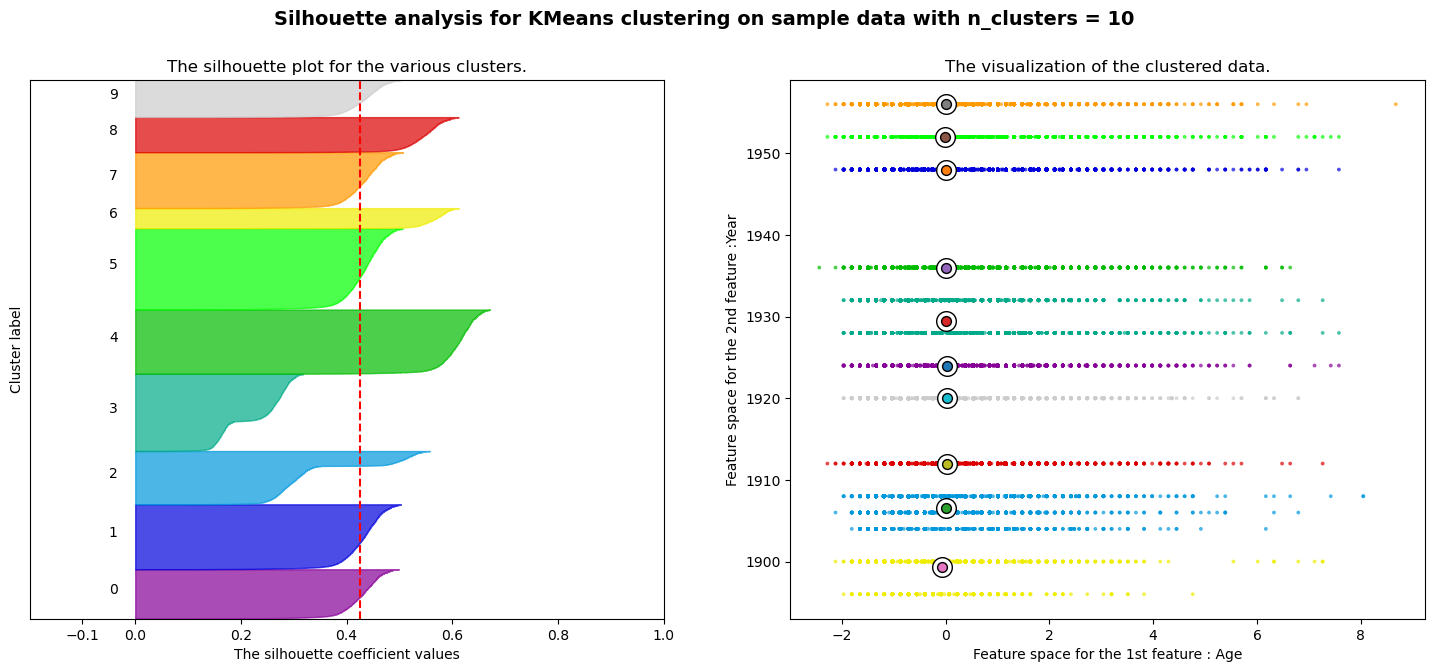

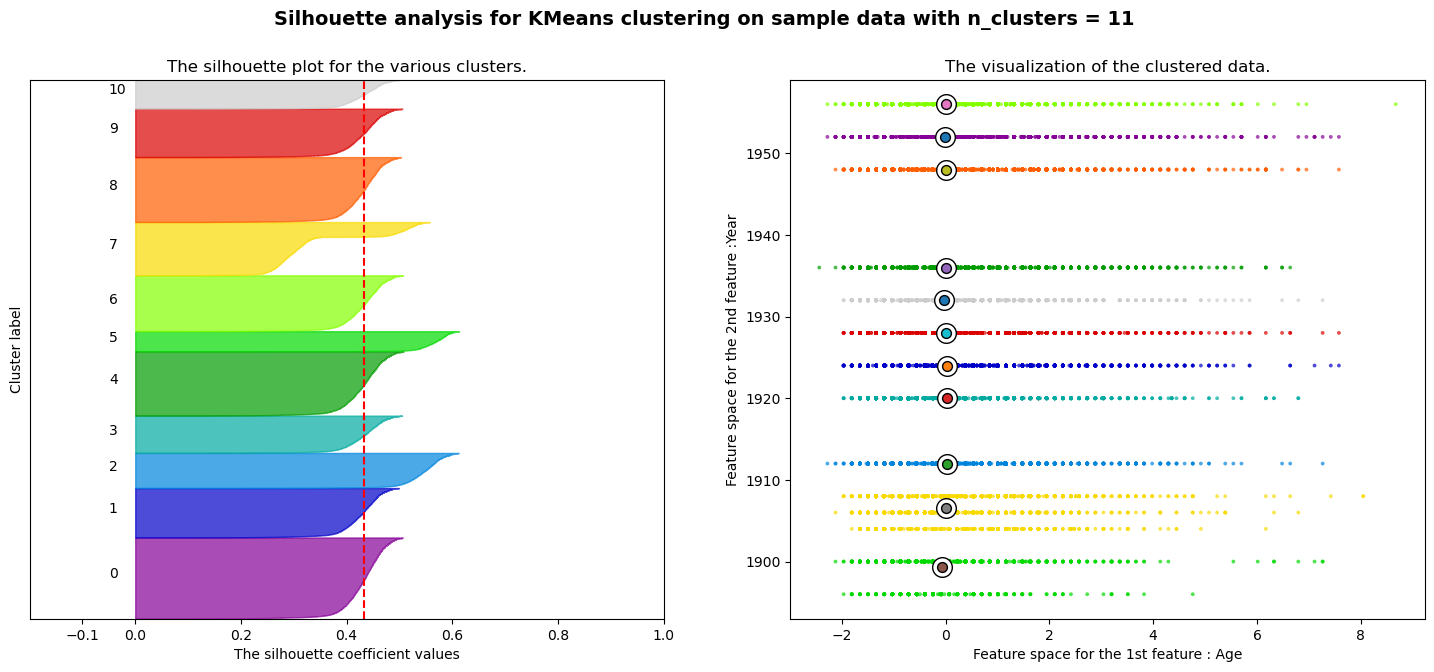

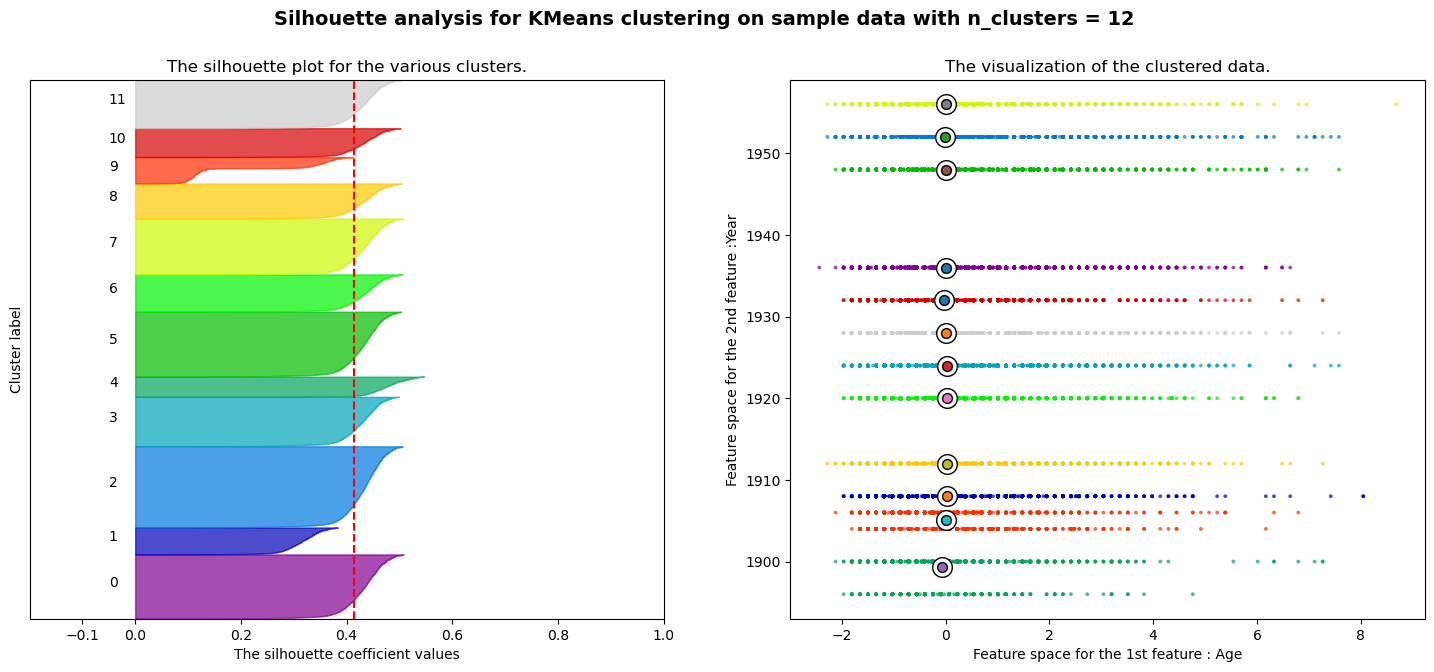

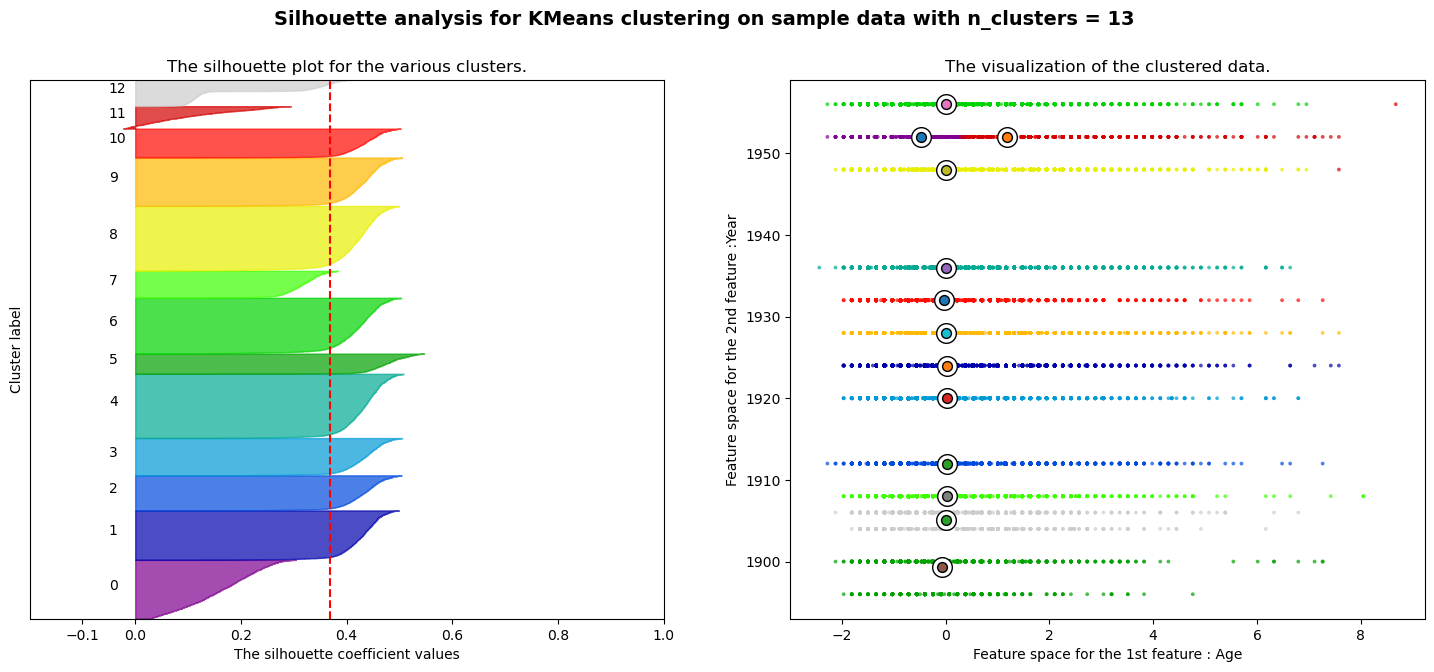

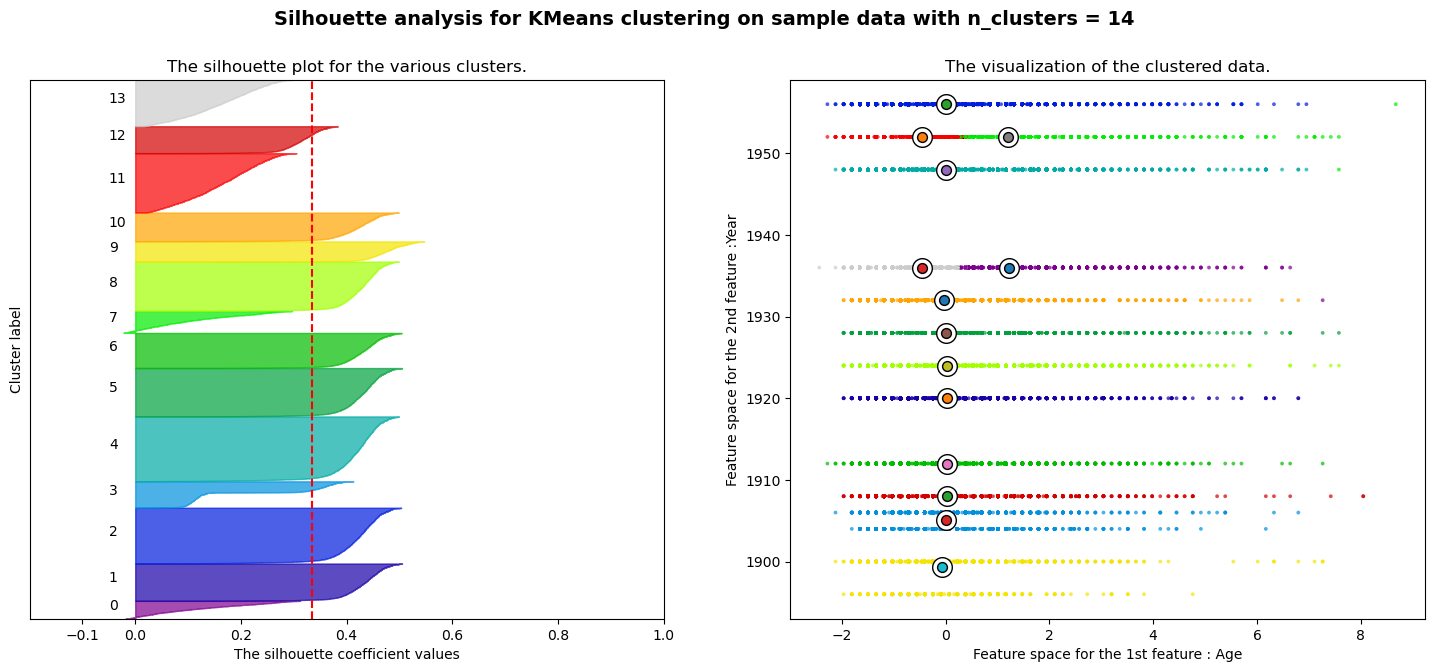

In [93]:
import matplotlib.cm as cm
range_n_clusters = range(2, 15)

r_seed = 17

cols = df_age_inputed.columns
X = df_age_inputed.copy()
X = X.values.astype("float32")

for n_clusters in range_n_clusters:

    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    
    # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.2, 1]
    ax1.set_xlim([-0.2, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the Pipeline with n_clusters value and a random generator seed for reproducibility.
    kmeans_pipeline = Pipeline([
            ("cluster", KMeans(n_clusters=n_clusters, random_state=r_seed, verbose=0))])
    
    cluster_labels = kmeans_pipeline.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(df_age_inputed, cluster_labels)
    print("For n_clusters =",
          n_clusters,
          "The average silhouette_score is :",
          silhouette_avg.round(4))

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i + 1) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0,
                          ith_cluster_silhouette_values,
                          facecolor=color,
                          edgecolor=color,
                          alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral((cluster_labels.astype(float) + 1) / n_clusters)
    ax2.scatter(X[:, 0], 
                X[:, 1], 
                marker=".", 
                s=30, 
                lw=0, 
                alpha=0.7, 
                c=colors, 
                edgecolor="k")

    # Labeling the clusters
    centers = kmeans_pipeline.named_steps["cluster"].cluster_centers_
    #centers = #kmeans_pipeline.named_steps["scaler"].inverse_transform(pipeline_centers)
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature : " + cols[0])
    ax2.set_ylabel("Feature space for the 2nd feature :" + cols[1])

    plt.suptitle(
        (
            "Silhouette analysis for KMeans clustering on sample data "
            "with n_clusters = %d" % n_clusters
        ),
        fontsize=14,
        fontweight="bold",
    )
print("\n")
plt.show()